# Simple linear regression 

In [24]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The first type of model, which we will spend a lot of time on, is the *simple linear regresssion model*. One simple way to think of it is via scatter plots. Below are heights of mothers and daughters collected by Karl Pearson in the late 19th century. 

In [2]:
fpath=r'.\data\01_heights.csv'

heights=pd.read_table(fpath,sep=',',index_col=0)
heights.head()

,Mheight,Dheight
1,59.7,55.1
2,58.2,56.5
3,60.6,56.0
4,60.7,56.8
5,61.8,56.0


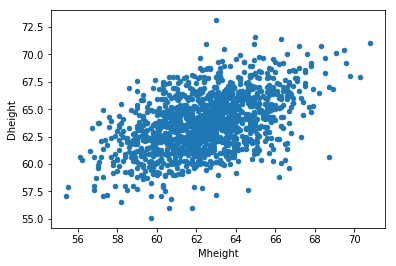

In [3]:
heights.plot.scatter(x='Mheight',y='Dheight')
plt.show()

A simple linear regression model fits a line through the above scatter plot in a particular way. Specifically, it tries to estimate the height of a new daughter in this population, say $D_{new}$, whose mother had height $H_{new}$. It does this by considering each slice of the data. Here is a slice of the data near $M=66$, the slice is taken over a window of size 1 inch.

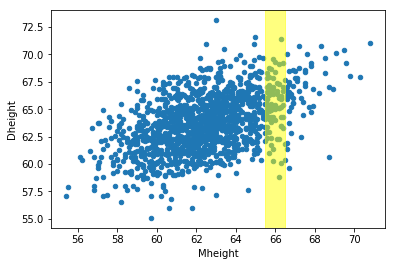

In [4]:
X = 66

heights.plot.scatter(x='Mheight',y='Dheight')
plt.axvspan(X-.5, X+.5,color='yellow',alpha=0.5)
plt.show()

In [5]:
selected_points = heights.Mheight.between(X-.5, X+.5)
mean_within_slice = heights.Dheight[selected_points].mean()
print(mean_within_slice)

65.17333333333333


We see that, in our sample, the average height of daughters whose height fell within our slice is about 65.2 inches. Of course this height varies by slice. For instance, at 60 inches:

In [6]:
X = 60
selected_points = heights.Mheight.between(X-.5, X+.5)
mean_within_slice = heights.Dheight[selected_points].mean()
print(mean_within_slice)

62.42828947368421


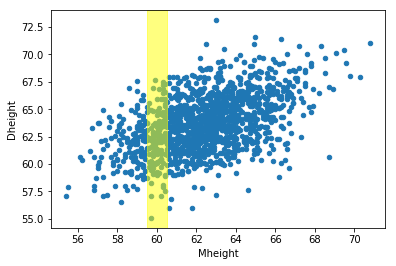

In [7]:
heights.plot.scatter(x='Mheight',y='Dheight')
plt.axvspan(X-.5, X+.5,color='yellow',alpha=0.5)
plt.show()

The regression model puts a line through this scatter plot in an *optimal* fashion.

In [8]:
results = smf.ols('Dheight ~ Mheight',data=heights).fit()
results.params

Intercept    29.917437
Mheight       0.541747
dtype: float64

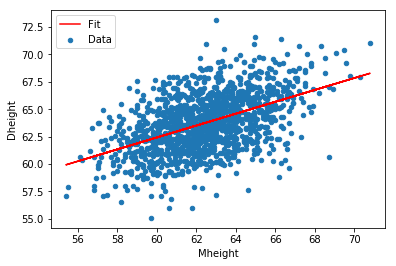

In [9]:
fig, ax = plt.subplots()
heights.plot.scatter(x='Mheight',y='Dheight',ax=ax,label='Data')
ax.plot(heights.Mheight, results.predict(heights.Mheight), color='red', label='Fit')
ax.legend()
plt.show()

## What is a "regression" model?

A regression model is a model of the relationships between some covariates (predictors) and an outcome. Specifically, regression is a model of the average outcome given the covariates.

## Mathematical formulation

For height of couples data: a mathematical model:
$$
{\tt Daughter} = f({\tt Mother}) + \varepsilon
$$
where $f$ gives the average height of the daughter of a mother of height Mother and $\varepsilon$ is the random variation within the slice.

## Linear regression models

* A *linear* regression model says that
the function $f$ is a sum (linear combination) of functions of ${\tt Mother}$.

* Simple linear regression model:
   $$f({\tt Mother}) = \beta_0 + \beta_1 \cdot {\tt Mother}$$
   for some unknown parameter vector $(\beta_0, \beta_1)$.

* Could also be a sum (linear combination) of *fixed* functions of `Mother`:
   $$f({\tt Mother}) = \beta_0 + \beta_1 \cdot {\tt Mother} + \beta_2 \cdot {\tt Mother}^2
   $$

## Simple linear regression model

 *  *Simple linear* regression is the case when there is only one predictor:
   $$
   f({\tt Mother}) = \beta_0 + \beta_1  \cdot {\tt Mother}.$$

* Let $Y_i$ be the height of the $i$-th daughter in the sample, $X_i$ be the height of the $i$-th mother.

* Model:
   $$
   Y_i = \underbrace{\beta_0 + \beta_1 X_i}_{\text{regression equation}} + \underbrace{\varepsilon_i}_{\text{error}}$$
   where $\varepsilon_i \sim N(0, \sigma^2)$ are independent.

* This specifies a *distribution* for the $Y$'s given the $X$'s, i.e.
   it is a *statistical model*.

## Fitting the model

* We will be using *least squares* regression. This measures
   the *goodness of fit* of a line by the sum of squared errors, $SSE$.
   
* Least squares regression chooses the line that minimizes
   $$
   SSE(\beta_0, \beta_1) = \sum_{i=1}^n (Y_i - \beta_0 - \beta_1 \cdot X_i)^2.$$

* In principle, we might measure goodness of fit differently: 
   $$
   SAD(\beta_0, \beta_1) = \sum_{i=1}^n |Y_i - \beta_0 - \beta_1 \cdot X_i|.$$
   
* For some *loss function* $L$ we might try to minimize
    $$
    L(\beta_0,\beta_1) = \sum_{i=1}^n L(Y_i-\beta_0-\beta_1X_i) 
    $$

## Why least squares?

* With least squares, the minimizers have explicit formulae -- not so important with today's computer power -- especially when $L$ is convex.

* Resulting formulae are *linear* in the outcome $Y$. This is important
   for inferential reasons. For only predictive power, this is also not so important.
   
* If assumptions are correct, then this is *maximum likelihood estimation*.

* Statistical theory tells us the *maximum likelihood estimators (MLEs)* are generally good estimators.

## Choice of loss function

The choice of the function we use to measure goodness of fit, or the *loss* function, has an outcome on what
sort of estimates we get out of our procedure. For instance, if, instead of fitting a line to a scatterplot, we were
estimating a *center* of a distribution, which we denote by $\mu$, then we might consider minimizing several loss functions.


## Choice of loss function

* If we choose the sum of squared errors:
$$
SSE(\mu) = \sum_{i=1}^n (Y_i - \mu)^2.
$$
Then, we know that the minimizer of $SSE(\mu)$ is the sample mean.

* On the other hand, if we choose the sum of the absolute errors
 $$
   SAD(\mu) = \sum_{i=1}^n |Y_i - \mu|.$$
   Then, the resulting minimizer is the sample median.
   
* Both of these minimization problems also have *population* versions as well. For instance, the population mean
minimizes, as a function of $\mu$
$$
\mathbb{E}((Y-\mu)^2)
$$
while the population median minimizes
$$
\mathbb{E}(|Y-\mu|).
$$

## Visualizing the loss function

Let's take a random scatter plot and view the loss function.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6424
Date:                Thu, 28 Dec 2017   Prob (F-statistic):              0.427
Time:                        19:00:02   Log-Likelihood:                -102.04
No. Observations:                  50   AIC:                             208.1
Df Residuals:                      48   BIC:                             211.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5118      0.271      5.586      0.000       0.968       2.056
x1            -0.2080      0.260     -0.801      0.427      -0.730       0.314
==============================================================================
Omnibus:                        1.124   Durbin-Watson:                   2.309
Prob(Omnibus):                  0.570   Jarque-Bera (JB):                0.479
Skew:                           0.182   Prob(JB):                        0.787
Kurtosis:                       3.313   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

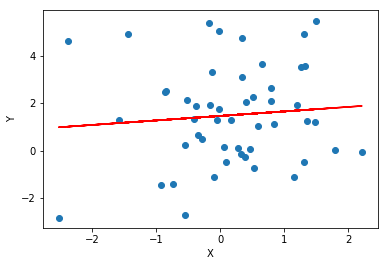

In [97]:
X = sp.random.normal(size=50)
Y = 1.5 + 0.1 * X + sp.random.normal(size=50) * 2

XC = sm.add_constant(X)
results = sm.OLS(Y, XC).fit()
results.summary()

plt.scatter(X,Y)
plt.plot(X,results.predict(XC), color='red', label='Fit')

plt.gca().set_xlabel('X')
plt.gca().set_ylabel('Y')
plt.show()

Let's plot the *loss* as a function of the parameters. Note that the *true* intercept is 1.5 while the *true* slope is 0.1.

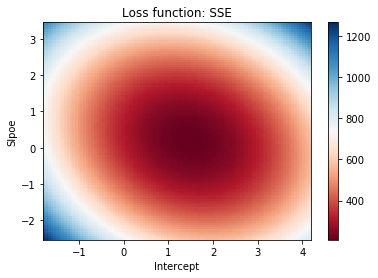

In [118]:
intercept= np.linspace(results.params[1]-2,results.params[1]+4,100)
slope    = np.linspace(results.params[0]-4,results.params[0]+2,100)
I,S = np.meshgrid(intercept,slope)

loss_data=np.zeros_like(I)

for index in np.ndindex(I.shape):
    loss_data[index]=((Y-X*S[index]-I[index])**2).sum()
    
plt.pcolormesh(I, S, loss_data, cmap='RdBu', vmin=loss_data.min(), vmax=loss_data.max() )
plt.colorbar()

ax = plt.gca()
ax.set_ylabel('Slpoe')
ax.set_xlabel('Intercept')
ax.set_title('Loss function: SSE')
plt.show()

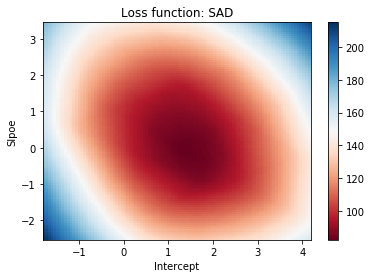

In [119]:
loss_data=np.zeros_like(I)

for index in np.ndindex(I.shape):
    loss_data[index]=np.abs(Y-X*S[index]-I[index]).sum()
    
plt.pcolormesh(I, S, loss_data, cmap='RdBu', vmin=loss_data.min(), vmax=loss_data.max() )
plt.colorbar()

ax = plt.gca()
ax.set_ylabel('Slpoe')
ax.set_xlabel('Intercept')
ax.set_title('Loss function: SAD')
plt.show()

## Geometry of least squares

The following picture will be with us, in various guises, throughout much of the course. It depicts
the geometric picture involved in least squares regression.

<img src="http://stats191.stanford.edu/figs/axes_simple.svg" width="600">

It requires some imagination but the picture should be thought as representing vectors in $n$-dimensional space, l where $n$ is the number of points in the scatterplot. In our height data, $n=1375$. The bottom two axes should be thought of as 2-dimensional, while the axis marked "$\perp$" should be thought of as $(n-2)$ dimensional, or, 1373 in this case.

## Important lengths

The (squared) lengths of the above vectors are important quantities in what follows.

There are three to note:
$$
\begin{aligned}
   SSE &= \sum_{i=1}^n(Y_i - \widehat{Y}_i)^2 = \sum_{i=1}^n (Y_i - \widehat{\beta}_0 - \widehat{\beta}_1 X_i)^2 \\
   SSR &= \sum_{i=1}^n(\overline{Y} - \widehat{Y}_i)^2 = \sum_{i=1}^n (\overline{Y} - \widehat{\beta}_0 - \widehat{\beta}_1 X_i)^2 \\
   SST &= \sum_{i=1}^n(Y_i - \overline{Y})^2 = SSE + SSR \\
   R^2 &= \frac{SSR}{SST} = 1 - \frac{SSE}{SST} = \widehat{Cor}(\pmb{X},\pmb{Y})^2.
   \end{aligned}
$$

## Important lengths

An important summary of the fit is the ratio
$$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$$
which measures *how much variability in $Y$* is explained by $X$.

## Example: wages vs. experience

In this example, we'll look at the output of *lm* for the wage data and verify that some of the equations we present for the 
least squares solutions agree with the output. The [data](http://qed.econ.queensu.ca/jae/2004-v19.7/koop-tobias/) was compiled from a study in econometrics

Gary Koop and Justin L. Tobias, "Learning about Heterogeneity in Returns to Schooling", Journal of Applied Econometrics, Vol. 19, No. 7, 2004, pp. 827-849.

In [10]:
%qtconsole